In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install qiskit-transpiler-service
# !pip install git+https://github.com/qiskit-community/Quantum-Korea-Hackathon-2024.git

  Using cached qiskit_ibm_runtime-0.24.1-py3-none-any.whl.metadata (19 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached requests_ntlm-1.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached ibm_platform_services-0.54.0-py3-none-any.whl
  Using cached pydantic-2.7.4-py3-none-any.whl.metadata (109 kB)
  Using cached ibm_cloud_sdk_core-3.20.1-py3-none-any.whl
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached certifi-2024.6.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached cryptography-42.0.8-cp39-abi3-win_amd64.whl.metadata (5.4 kB)
  Using cached pyspnego-0.11.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.18.4-cp312-non

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit_ibm_runtime.fake_provider import FakeKyiv
from qiskit_transpiler_service.transpiler_service import TranspilerService
from qkh2024.grader import scorer

In [2]:
service = QiskitRuntimeService(channel="iqm_quantum", token="fa0372ac79105aaec3e2bbff758cb43dc9506244ea5fba95957381cd14f56a38fc96f0fbc31e98d93318017772027e45f80ab6e71678e18d44e05f8f6655516b")
backend = service.backend("ibm_sherbrooke")
scorer = scorer()

In [3]:
transpiler_list = []
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=1, 
))
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=2, 
))
transpiler_list.append(TranspilerService( 
    backend_name="ibm_sherbrooke", 
    ai="false", 
    optimization_level=3, 
))
transpiler_list.append(TranspilerService(
    backend_name="ibm_sherbrooke", 
    ai="true", 
    optimization_level=3, 
))

In [4]:
tr_depths = [[], [], [], []]
tr_gate_counts = [[], [], [], []]
tr_cnot_counts = [[], [], [], []]
tr_scores = [[], [], [], []]

In [5]:
# Transpile and collect result stats
num_qubits = np.arange(2, 15)

for nq in num_qubits:
    print(f'Start transpiling the {nq}-qubit circuit')
    circuit = QuantumCircuit(nq)
    circuit.h(range(nq))
    circuit.append(QFT(nq, do_swaps=False, inverse=True).decompose(), range(nq))
    for i in range(4):
        isa_circuit = transpiler_list[i].run(circuit)
        scorer.validate(circuit, isa_circuit, backend)
        tr_depths[i].append(isa_circuit.depth())
        tr_gate_counts[i].append(sum(isa_circuit.count_ops().values()))
        tr_cnot_counts[i].append(isa_circuit.num_nonlocal_gates())
        tr_scores[i].append(scorer.score(isa_circuit, backend))

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Start transpiling the 2-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 3-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 4-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 5-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 6-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 7-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 8-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 9-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 10-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 11-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 12-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 13-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit
Start transpiling the 14-qubit circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service


Congratualtions! Your circuit is within the given tolerance of the original circuit


INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Basis gate check passed!
The connections match with the backend
Congratualtions! Your circuit is within the given tolerance of the original circuit


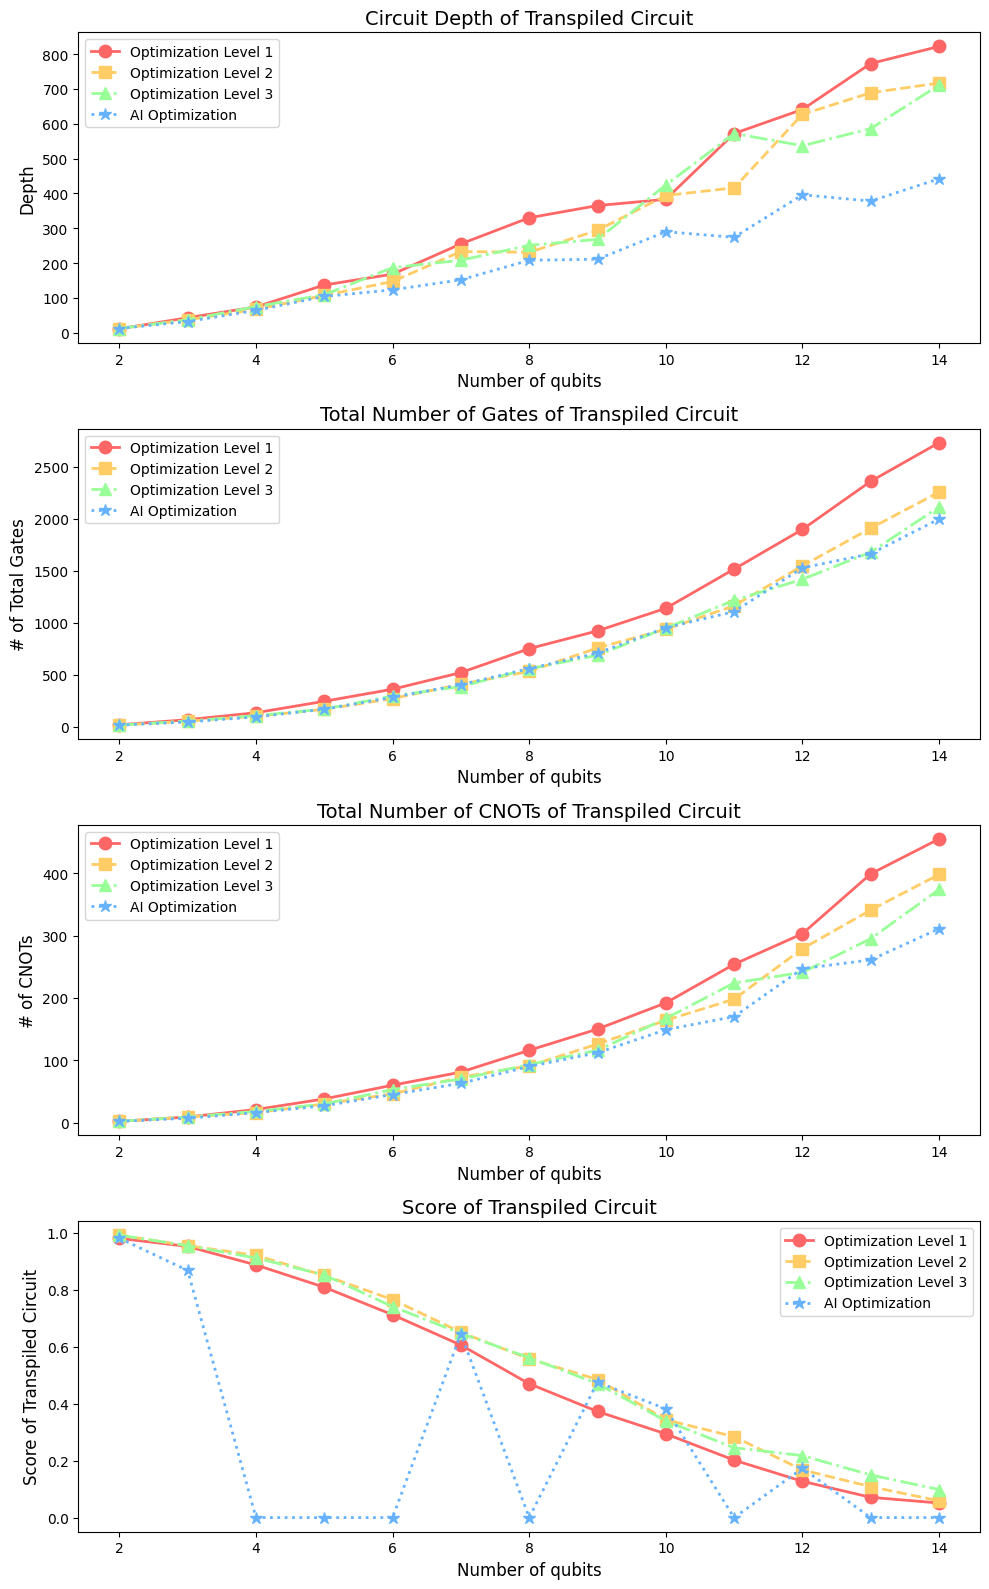

In [6]:
import matplotlib.pyplot as plt

ax = num_qubits
opt_list = ['Optimization Level 1', 'Optimization Level 2', 'Optimization Level 3', 'AI Optimization']
markers = ['o', 's', '^', '*']
linestyles = ['-', '--', '-.', ':']
colors = ['#FF6666', '#FFCC66', '#99FF99', '#66B2FF']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 16))

# Plot 1: Circuit Depth
for i in range(4):
    ax1.plot(ax, tr_depths[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax1.set_xlabel("Number of qubits", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth of Transpiled Circuit", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
for i in range(4):
    ax2.plot(ax, tr_gate_counts[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax2.set_xlabel("Number of qubits", fontsize=12)
ax2.set_ylabel("# of Total Gates", fontsize=12)
ax2.set_title("Total Number of Gates of Transpiled Circuit", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Total Number of CNOTs
for i in range(4):
    ax3.plot(ax, tr_cnot_counts[i], label=opt_list[i], marker=markers[i],markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax3.set_xlabel("Number of qubits", fontsize=12)
ax3.set_ylabel("# of CNOTs", fontsize=12)
ax3.set_title("Total Number of CNOTs of Transpiled Circuit", fontsize=14)
ax3.legend(fontsize=10)

# Plot 4: Score of Transpiled Circuit
for i in range(4):
    ax4.plot(ax, tr_scores[i], label=opt_list[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax4.set_xlabel("Number of qubits", fontsize=12)
ax4.set_ylabel("Score of Transpiled Circuit", fontsize=12)
ax4.set_title("Score of Transpiled Circuit", fontsize=14)
ax4.legend(fontsize=10)

fig.tight_layout()
plt.show()